#### Rozdeleni dat, model a uceni modelu

In [1]:
from miditok import TSD, REMI, REMIPlus, TokenizerConfig  # here we choose to use REMI
from pathlib import Path
from miditoolkit import MidiFile
from random import seed, random
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torch

/home/komorebi/study/study_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = TSD(params=Path("tokenizer.conf"))

In [3]:
len(tokenizer)

1000

In [4]:
tokenizer.io_format

('T',)

In [5]:
tokens_paths = list(Path('midi_vocab_bpe').glob("**/*.json"))

In [6]:
import json

In [7]:
midi_bpe_tokens = []
for f in tokens_paths:
    with open(f) as f:
        d = json.load(f)
        midi_bpe_tokens.append(d)

In [8]:
from miditok.pytorch_data import DatasetTok, DataCollator

In [9]:
tokenizer.vocab

{'PAD_None': 0,
 'BOS_None': 1,
 'EOS_None': 2,
 'MASK_None': 3,
 'Pitch_21': 4,
 'Pitch_22': 5,
 'Pitch_23': 6,
 'Pitch_24': 7,
 'Pitch_25': 8,
 'Pitch_26': 9,
 'Pitch_27': 10,
 'Pitch_28': 11,
 'Pitch_29': 12,
 'Pitch_30': 13,
 'Pitch_31': 14,
 'Pitch_32': 15,
 'Pitch_33': 16,
 'Pitch_34': 17,
 'Pitch_35': 18,
 'Pitch_36': 19,
 'Pitch_37': 20,
 'Pitch_38': 21,
 'Pitch_39': 22,
 'Pitch_40': 23,
 'Pitch_41': 24,
 'Pitch_42': 25,
 'Pitch_43': 26,
 'Pitch_44': 27,
 'Pitch_45': 28,
 'Pitch_46': 29,
 'Pitch_47': 30,
 'Pitch_48': 31,
 'Pitch_49': 32,
 'Pitch_50': 33,
 'Pitch_51': 34,
 'Pitch_52': 35,
 'Pitch_53': 36,
 'Pitch_54': 37,
 'Pitch_55': 38,
 'Pitch_56': 39,
 'Pitch_57': 40,
 'Pitch_58': 41,
 'Pitch_59': 42,
 'Pitch_60': 43,
 'Pitch_61': 44,
 'Pitch_62': 45,
 'Pitch_63': 46,
 'Pitch_64': 47,
 'Pitch_65': 48,
 'Pitch_66': 49,
 'Pitch_67': 50,
 'Pitch_68': 51,
 'Pitch_69': 52,
 'Pitch_70': 53,
 'Pitch_71': 54,
 'Pitch_72': 55,
 'Pitch_73': 56,
 'Pitch_74': 57,
 'Pitch_75': 58,
 'Pitc

In [10]:
collator = DataCollator(tokenizer["PAD_None"], tokenizer["BOS_None"], tokenizer["EOS_None"], copy_inputs_as_labels=True, shift_labels=True)

In [11]:
dataset = DatasetTok(
    tokens_paths, max_seq_len=384, min_seq_len=256,  one_token_stream=True, 
)

Loading data: midi_vocab_bpe/The Hollies: 100%|████████████████████████████████████| 1684/1684 [00:03<00:00, 499.75it/s]


In [12]:
tokenizer.vocab_bpe

{'ÞīF': 714,
 'é': 200,
 'ńL': 715,
 '«': 138,
 '\x9dīP': 611,
 '\x9c¬': 721,
 'ł': 289,
 'ż': 347,
 '\xa0': 127,
 '\x9dī>': 461,
 'ī3\x9c\x9dī:': 807,
 'ƅ': 356,
 'ī8': 415,
 '\x97\xa0': 458,
 '\x8c\x9eŅ': 899,
 'z': 89,
 'ė': 246,
 'Ŗ': 309,
 'ıN': 855,
 '÷': 214,
 '\x9c\xa0Þ': 856,
 '\x90\x9dĬ': 920,
 '\x90\x9d': 466,
 '\x87\xa0': 969,
 "'": 6,
 'L': 43,
 '\x95\x9eÞ': 469,
 'ßī:': 820,
 '\x9a\x9d': 597,
 'ĭP': 656,
 'Ŭ': 331,
 '\x9eīC': 690,
 '\x9dàō': 532,
 '\x95\x9dà': 613,
 '²': 145,
 'Î': 173,
 '\x88\x9d': 608,
 'Ō8': 885,
 '\x9eī': 397,
 '\x97\x9f': 470,
 'Ŋ;': 957,
 '×': 182,
 'u': 84,
 'ã': 194,
 '\xa0ŅL': 980,
 '\x9eī>': 679,
 '¨': 135,
 'ų': 338,
 'ƞ': 381,
 'Ŏ6': 906,
 '\x8e¡': 775,
 'R': 49,
 '\x94¬': 982,
 'ī9': 742,
 'm': 76,
 'Ē': 241,
 'ĭL': 684,
 '\x95\x9d': 429,
 '\x9dàī:': 737,
 '\x94£': 792,
 '6': 21,
 'Ĭ': 267,
 '\x93\x9dÞ': 581,
 '\x8f¡': 743,
 '\x92¢': 681,
 'ŅH': 805,
 'ī3\x99': 986,
 'Ŋ?': 747,
 '1': 16,
 'Ó': 178,
 'àī6': 921,
 'ú': 217,
 '\x83': 98,
 '\x96\

In [13]:
data = collator(dataset)

In [14]:
data['input_ids'][:5]

tensor([[  1, 219, 292,  ..., 418, 715, 418],
        [  1, 643, 418,  ...,  55, 528, 573],
        [  1, 418, 535,  ..., 643, 418, 881],
        [  1, 418, 306,  ..., 881, 418, 398],
        [  1, 470, 191,  ..., 407, 470, 191]])

In [15]:
data['labels'][:5]

tensor([[219, 292,  59,  ..., 715, 418,   2],
        [643, 418, 881,  ..., 528, 573,   2],
        [418, 535, 418,  ..., 418, 881,   2],
        [418, 306,  28,  ..., 418, 398,   2],
        [470, 191, 573,  ..., 470, 191,   2]])

In [16]:
data = zip(data['input_ids'], data['labels'], torch.tensor([torch.count_nonzero(d).item() for d in data['attention_mask']]))

In [17]:
data_list = list(data)

In [18]:
len(data_list)

59667

Rozdeleni dat

In [19]:
seed(42)
data_chosen = []
for d in data_list[:int(len(data_list)/4)]:
        data_chosen.append(d)

In [20]:
seed(42)
valid_chosen = []
train_chosen = []
for d in data_chosen:
    if random() > 0.75:
        valid_chosen.append(d)
    else:
        train_chosen.append(d)

In [21]:
seed(42)
valid = []
test = []
for d in valid_chosen:
    if random() > 0.75:
        test.append(d)
    else:
        valid.append(d)
valid_chosen = valid
test_chosen = test

In [22]:
len(data_chosen)


14916

In [23]:
len(train_chosen)

11202

In [24]:
len(valid_chosen)

2780

In [25]:
len(test_chosen)

934

In [26]:
import torch
from torch.utils.data import Dataset, DataLoader

class Dataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [27]:
batch_size = 16

In [28]:
train_loader = DataLoader(Dataset(train_chosen), batch_size=batch_size, shuffle=True, drop_last=True)

In [29]:
valid_loader = DataLoader(Dataset(valid_chosen), batch_size=batch_size, shuffle=True, drop_last=True)

In [30]:
test_loader = DataLoader(Dataset(test_chosen), batch_size=batch_size, shuffle=True, drop_last=True)

In [31]:
len(train_loader)

700

### Model definition:

In [32]:
class MusicVAE(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size, latent_size, num_layers, batch_size=16, max_seq_len=385):
        super(MusicVAE, self).__init__()

        self.vocab_size = vocab_size
        self.embedding_size = embedding_size
        self.hidden_size = hidden_size
        self.latent_size = latent_size
        self.num_layers = num_layers
        self.batch_size = batch_size
        self.max_seq_len = max_seq_len


        self.embedding = nn.Embedding(vocab_size, embedding_size)

        self.encoder = nn.LSTM(embedding_size, embedding_size, num_layers, batch_first=True, bidirectional=True, dropout=0.1)

        self.fc_mu = nn.Linear(num_layers*embedding_size*2, hidden_size)
        self.fc_log_var = nn.Linear(num_layers*embedding_size*2, hidden_size)
        self.log_var_act = nn.Tanh()


        self.fc1 = nn.Linear(hidden_size,  num_layers*embedding_size)
        self.fc1_act=nn.Tanh()


        self.orchestra = nn.LSTM(embedding_size, embedding_size, num_layers, batch_first=True, dropout=0.1)
        
        self.forward_norm = torch.nn.LayerNorm(embedding_size)
        self.forward_act = nn.GELU()
        self.fc_softmax= nn.Linear(embedding_size, vocab_size)
        
    
    def init_hidden(self, batch_size):
        hidden_cell = torch.zeros(self.num_layers*2, batch_size, self.embedding_size).to("cuda")
        state_cell = torch.zeros(self.num_layers*2, batch_size, self.embedding_size).to("cuda")
        return (hidden_cell, state_cell)

    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1).float()
        mask = mask.masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask
        
    def generate_padding_mask(self, seq_lens):
   
        batch_size = len(seq_lens)
        mask = torch.arange(self.max_seq_len).expand(batch_size, self.max_seq_len) > seq_lens.unsqueeze(1)

    
        return mask.cuda()
        
    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        epsilon = torch.randn_like(std)
        return mu + std * epsilon

    def encode(self, x, hidden_encoder):

        x, (h, c) = self.encoder(x, hidden_encoder)

        
        output_encoder, _ = torch.nn.utils.rnn.pad_packed_sequence(x, batch_first=True, total_length=self.max_seq_len)

        mu = self.fc_mu(h.permute(1,0,2).flatten(1))
        log_var = self.log_var_act(self.fc_log_var(h.permute(1,0,2).flatten(1)))
    
        return x, mu, log_var, h, c

    def get_embeddings(self, x):
        return self.embedding(x)

    def decode(self, x, z):
        #print(z.shape)
        h_d = self.fc1_act(self.fc1(z))
        #print(h_d.shape)


        h_d = h_d.unflatten(1, (self.num_layers, self.embedding_size)).contiguous().permute(1,0,2)
        #print(h_d.shape)

    
        
        
        output_orchestra, _ = self.orchestra(x, (h_d, h_d))
        output_orchestra, _ = torch.nn.utils.rnn.pad_packed_sequence(output_orchestra, batch_first=True, total_length=self.max_seq_len)

        
        output = self.forward_act(self.forward_norm(output_orchestra))
        
        out = self.fc_softmax(output)
        return out
    
    

    def forward(self, x, seq_lens, hidden_encoder):
        x_emb = self.get_embeddings(x)
        
        x = x_emb
        
        x_packed = torch.nn.utils.rnn.pack_padded_sequence(input=x, lengths=seq_lens, batch_first=True, enforce_sorted=False)
        
        _, mu, log_var, h_enc, c_enc  = self.encode(x_packed, hidden_encoder)

        
        z = self.reparameterize(mu, log_var)

        out = self.decode(x_packed, z)

        return F.log_softmax(out, dim=2).permute(0,2,1), mu, log_var, h_enc, c_enc


In [33]:
vae_lstm = MusicVAE(len(tokenizer), 224, 256, 64, 2).to("cuda")

In [34]:
for batch in train_loader:
    break

In [35]:
ids, target, lens = batch

In [36]:
states = vae_lstm.init_hidden(batch_size)

In [37]:
out, mu, log_var, h, c = vae_lstm(ids.to("cuda"), lens, (states[0].cuda(), states[1].cuda()))

Vae Loss with beta=4, trying to avoid posterior collapse

In [38]:
def vae_loss(x, x_reconstructed, mu, log_var):


    reconstruction_loss = F.nll_loss(x_reconstructed, x, reduction='mean')

  


    kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp(), dim =1,  keepdim=True)
    kl_divergence = kl_divergence.sum(-1).mean()

    beta = 2

    total_loss = reconstruction_loss + beta*kl_divergence 
    return total_loss


In [39]:
import gc
del vae_lstm

In [40]:
torch.cuda.empty_cache()
gc.collect()

0

In [41]:
vae_lstm = MusicVAE(len(tokenizer), 256, 384, 64,  2).to("cuda")

In [42]:
optimizer = optim.Adam(vae_lstm.parameters(), lr=0.001)
train_mean = []
valid_mean = []
# Обучение модели
num_epochs = 7
for epoch in range(num_epochs):
    i = 1
    states = vae_lstm.init_hidden(batch_size)
    vae_lstm.train()
    train_mean_error=[]
    valid_mean_error = []
    for batch in train_loader:  
        
        ids, labels, lens = batch  
        optimizer.zero_grad()
        out, mu, log_var, h, c = vae_lstm(ids.to("cuda"), lens, states)
        
        states = h.detach(), c.detach()
        #print(outputs)
        #print(outputs.shape)
        # Вычисление функции потерь
        loss = vae_loss(labels.to("cuda"), out, mu, log_var)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(vae_lstm.parameters(), 0.9)
        optimizer.step()
        train_mean_error.append(loss.item())
        if i % 10 == 0:
            print(f'Batch {i}, Loss: {np.mean(train_mean_error).item():.4f}')
        i+=1
    vae_lstm.eval()
    with torch.inference_mode():
        states = vae_lstm.init_hidden(batch_size)
        for batch in valid_loader:  
            ids, labels, lens = batch
            out, mu, log_var, h, c = vae_lstm(ids.to("cuda"), lens, states)
            states = h.detach(), c.detach()
            loss = vae_loss(labels.to("cuda"), out, mu, log_var)
            valid_mean_error.append(loss.item())
            
    valid_mean.append(np.mean(valid_mean_error)) 
    train_mean.append(np.mean(train_mean_error))
        

    print(f'Epoch [{epoch+1}/{train_mean[-1]}], Loss: {loss.item():.4f}')
    print(f'Epoch [{epoch+1}/{valid_mean[-1]}], Loss: {loss.item():.4f}')


Batch 10, Loss: 7.8194
Batch 20, Loss: 7.3145
Batch 30, Loss: 7.0260
Batch 40, Loss: 6.8231
Batch 50, Loss: 6.6693
Batch 60, Loss: 6.5333
Batch 70, Loss: 6.4001
Batch 80, Loss: 6.2734
Batch 90, Loss: 6.1541
Batch 100, Loss: 6.0324
Batch 110, Loss: 5.9183
Batch 120, Loss: 5.8055
Batch 130, Loss: 5.6988
Batch 140, Loss: 5.6011
Batch 150, Loss: 5.5145
Batch 160, Loss: 5.4355
Batch 170, Loss: 5.3547
Batch 180, Loss: 5.2865
Batch 190, Loss: 5.2199
Batch 200, Loss: 5.1566
Batch 210, Loss: 5.0961
Batch 220, Loss: 5.0374
Batch 230, Loss: 4.9862
Batch 240, Loss: 4.9367
Batch 250, Loss: 4.8869
Batch 260, Loss: 4.8423
Batch 270, Loss: 4.7991
Batch 280, Loss: 4.7549
Batch 290, Loss: 4.7143
Batch 300, Loss: 4.6759
Batch 310, Loss: 4.6409
Batch 320, Loss: 4.6049
Batch 330, Loss: 4.5704
Batch 340, Loss: 4.5390
Batch 350, Loss: 4.5088
Batch 360, Loss: 4.4824
Batch 370, Loss: 4.4534
Batch 380, Loss: 4.4259
Batch 390, Loss: 4.4023
Batch 400, Loss: 4.3778
Batch 410, Loss: 4.3515
Batch 420, Loss: 4.3294
B

In [43]:
len(train_mean)

7

In [44]:
len(valid_mean)

7

In [45]:
vae_lstm.eval()
test_mean = []
states = vae_lstm.init_hidden(batch_size)
with torch.inference_mode():
    for batch in test_loader:
        states = vae_lstm.init_hidden(batch_size)
        ids, labels, lens = batch
        out, mu, log_var, h, c = vae_lstm(ids.to("cuda"), lens, states)
        states = h.detach(), c.detach()
        loss = vae_loss(labels.to("cuda"), out, mu, log_var)
        test_mean.append(loss.item())   
print(f'E{test_mean[-1]}')


E2.294529438018799


In [46]:
torch.save(vae_lstm.state_dict(), "model_trained_20.pt")

In [48]:
vae_lstm.load_state_dict(torch.load("model_trained_20.pt"))

<All keys matched successfully>

In [49]:
vae_lstm.eval()

MusicVAE(
  (embedding): Embedding(1000, 256)
  (encoder): LSTM(256, 256, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  (fc_mu): Linear(in_features=1024, out_features=384, bias=True)
  (fc_log_var): Linear(in_features=1024, out_features=384, bias=True)
  (log_var_act): Tanh()
  (fc1): Linear(in_features=384, out_features=512, bias=True)
  (fc1_act): Tanh()
  (orchestra): LSTM(256, 256, num_layers=2, batch_first=True, dropout=0.1)
  (forward_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (forward_act): GELU(approximate='none')
  (fc_softmax): Linear(in_features=256, out_features=1000, bias=True)
)

In [50]:
sum(p.numel() for p in vae_lstm.parameters())

5180136

In [72]:
def inference(n_samples, z):
    with torch.inference_mode():


        batch_size = 1
        seq_len = 1
        idx_sample = []
    
    
        input_tokens = [tokenizer["BOS_None"]]
        #input_tokens = test_chosen[0][0][:18].numpy().tolist()
        h_d = vae_lstm.fc1_act(vae_lstm.fc1(z))
        print(h_d.shape)
        
        h_d = h_d.unflatten(1, (vae_lstm.num_layers, vae_lstm.embedding_size)).contiguous().permute(1,0,2)
        hidden = (h_d, h_d)
        input = torch.Tensor(input_tokens).long().cuda()
        input = input.unsqueeze(0)

        #input =  torch.nn.functional.pad(input, (0, vae_lstm.max_seq_len - len(input_tokens)))
        print(input.shape)

        seq_len = 2
        
        for i in range(n_samples):

            seq_lens = torch.Tensor([seq_len]).long().cpu()
            #print(seq_lens.shape)
            
            #print(attn_pad_mask)
        
            input_emb = vae_lstm.embedding(input)         

            #input_emb = torch.nn.utils.rnn.pack_padded_sequence(input=input_emb, lengths=seq_lens, batch_first=True, enforce_sorted=False)
            #attn_pad_mask = vae_lstm.generate_padding_mask(torch.Tensor([seq_len]))

            
            output, hidden = vae_lstm.orchestra(input_emb, hidden)

            #output_orchestra, _ = torch.nn.utils.rnn.pad_packed_sequence(output, batch_first=True, total_length=vae_lstm.max_seq_len)

            output = vae_lstm.forward_act(vae_lstm.forward_norm(output))

            

            output = vae_lstm.fc_softmax(output)

            output = F.log_softmax(output, dim=2)

          
            output = output.exp()

            _, s = torch.topk(output, 1, dim=2)

            #print(s.shape)
            
            #print(s[0][-1])
            s =  s[0][-1].item()
            seq_len+=1
            
            input_tokens.append(s)
            input = torch.Tensor([s]).long().cuda()
            input = input.unsqueeze(0)
            if(s == 2):
                break
            #input =  torch.nn.functional.pad(input, (0, vae_lstm.max_seq_len - len(input_tokens)))
            #print(input.shape)

        print(input_tokens)
        

    return input_tokens

In [73]:
midi_out = inference(256, torch.randn(1,384).to("cuda"))

torch.Size([1, 512])
torch.Size([1, 1])
[1, 117, 139, 402, 122, 473, 508, 306, 15, 565, 348, 253, 348, 43, 110, 155, 348, 48, 110, 155, 348, 52, 111, 155, 189, 402, 565, 435, 560, 328, 55, 518, 328, 67, 518, 348, 55, 466, 348, 59, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 466, 348, 62, 533, 546, 655, 348, 55, 649, 348, 59, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649, 348, 62, 649

In [74]:
help(tokenizer.tokens_to_midi)

Help on method wrapper in module miditok.midi_tokenizer:

wrapper(*args, **kwargs) method of miditok.tokenizations.tsd.TSD instance



In [75]:
midi = tokenizer.tokens_to_midi(midi_out)

In [76]:
midi.dump("output.mid")

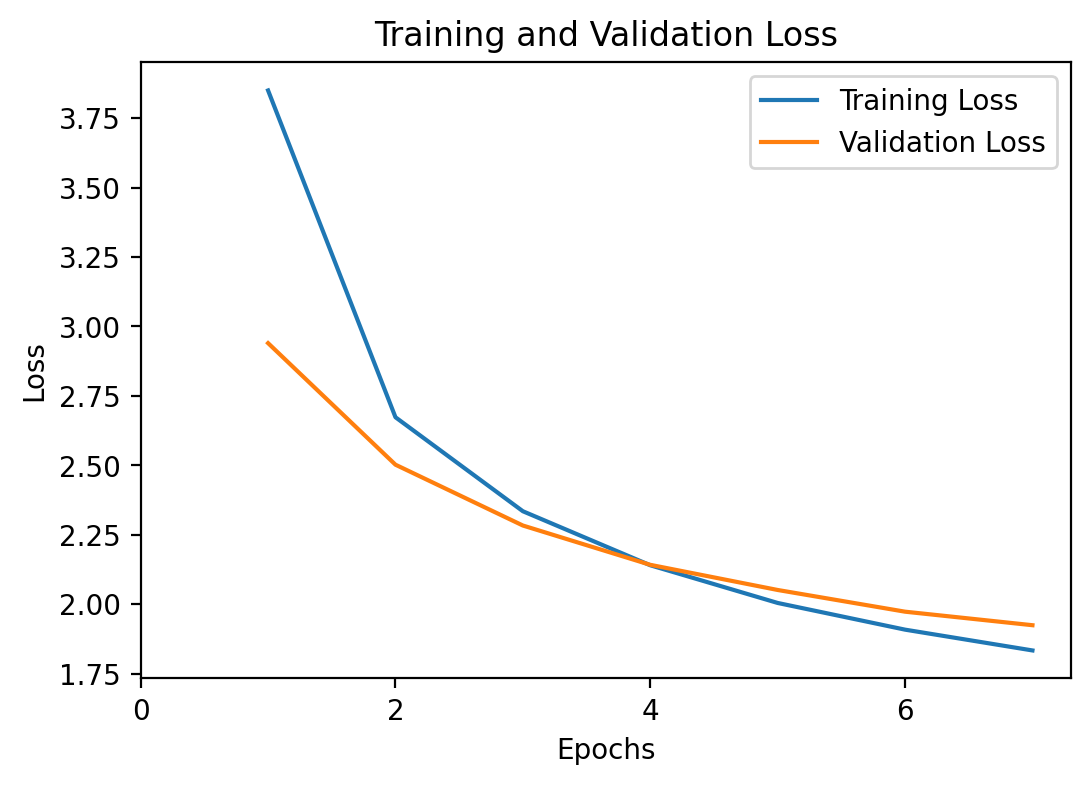

<Figure size 640x480 with 0 Axes>

In [83]:
from pickle import load
from matplotlib.pylab import plt
from numpy import arange
 
# Load the training and validation loss dictionaries

 
# Retrieve each dictionary's values
from matplotlib.pyplot import figure

f = figure(figsize=(6, 4), dpi=200)
 
# Generate a sequence of integers to represent the epoch numbers
epochs = range(1, 8)
 
# Plot and label the training and validation loss values
plt.plot(epochs, train_mean, label='Training Loss')
plt.plot(epochs, valid_mean, label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
plt.xticks(arange(0, 8, 2))
 
# Display the plot
plt.legend(loc='best')
plt.show()
plt.savefig('results.png')